In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
data = pd.read_csv("mpd_stats.csv")
ticker_def = pd.read_csv("ticker_def.csv", index_col=["ticker"])

data = data.merge(ticker_def, left_on=["market"], right_index=True, how="left")
data.loc[:, "idt"] = pd.to_datetime(data["idt"])
rate_data = data.loc[data["type"].isin(["rate", "inflation"])]

In [78]:
rate_data.to_csv('rate_dataframe.csv', index=False)

In [79]:
rate_data.groupby("market").first()

,idt,maturity_target,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc,name,type
market,,,,,,,,,,,,,,,
LR3y3m,2006-08-10,60.0,0.064999,0.032129,1.460687,2.146478,0.034048,0.047839,0.053568,-5.77031,0.001022,5.77031,0.040075,"3 month LIBOR, 3-years-out",rate
LR5y3m,2006-01-12,NaN,0.048872,0.022622,0.268663,0.436007,0.017336,0.049207,0.076874,-11.12000,0.045299,11.12000,0.051615,"3 month LIBOR, 5-years-out",rate
infl1y,2010-01-07,12.0,0.013336,0.018055,0.019277,0.182388,-0.014491,0.014799,0.034382,1.00000,0.396946,3.00000,0.167960,"CPI cap/floor-based inflation expectations, 1 ...",inflation
infl2y,2009-06-25,24.0,0.014230,0.026015,0.848134,0.814701,-0.014828,0.011069,0.049330,-1.00000,0.484264,3.00000,0.253807,"CPI cap/floor-based inflation expectations, 2 ...",inflation
infl5y,2009-06-25,60.0,0.019726,0.024559,0.525449,0.142628,0.000955,0.017753,0.052609,-1.00000,0.376203,3.00000,0.322725,"CPI cap/floor-based inflation expectations, 5 ...",inflation
tr10yr,2013-10-17,3.0,0.000880,0.028210,-0.593210,0.795630,-0.035800,0.003050,0.034010,-5.00000,0.053140,5.00000,0.022850,10-Year Treasury price (CME),rate
tr5yr,2014-09-10,3.0,0.000730,0.015480,-0.497250,0.628200,-0.019800,0.001520,0.018990,-3.00000,0.037960,3.00000,0.017040,5-Year Treasury price (CME),rate


In [62]:
tickers = rate_data["market"].unique()
start_date, end_date = rate_data["idt"].min(), rate_data["idt"].max()
print(tickers)
print(start_date, end_date)

['infl1y' 'infl2y' 'infl5y' 'LR3y3m' 'LR5y3m' 'tr10yr' 'tr5yr']
2006-01-12 00:00:00 2024-01-10 00:00:00


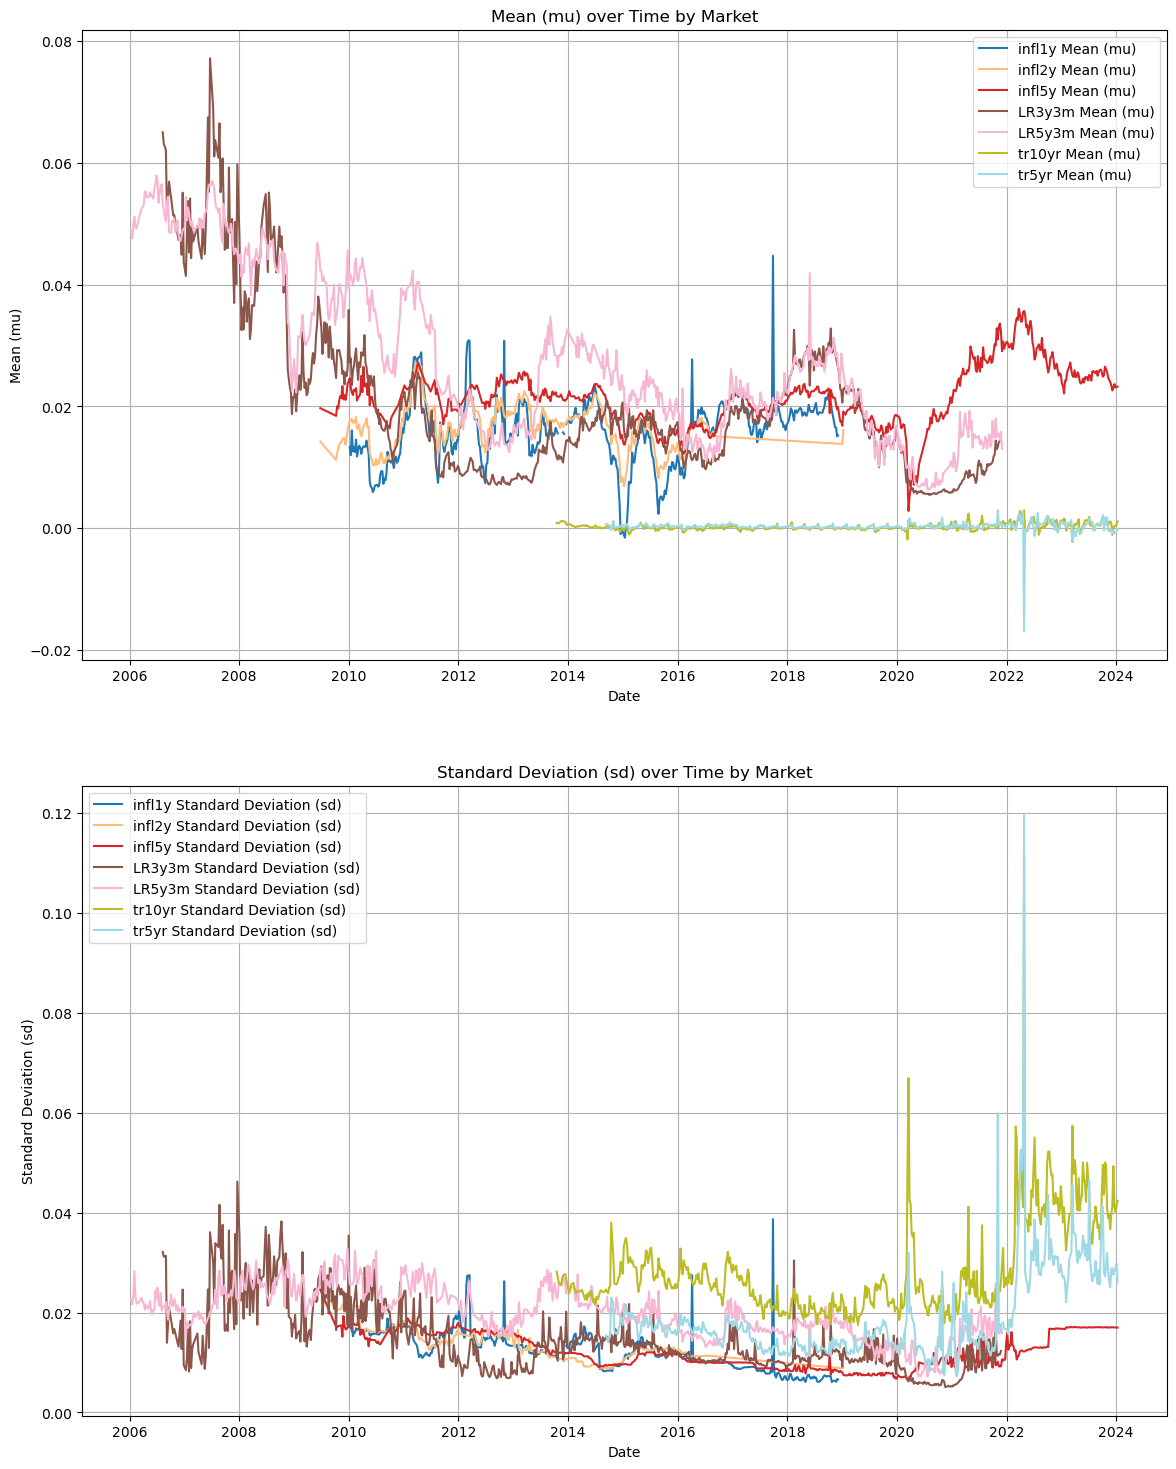

In [63]:
color_map = cm.get_cmap('tab20', len(markets)) 
market_colors = {market: color_map(i) for i, market in enumerate(markets)}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 18))

# Mean evolution
for market in markets:
    market_data = rate_data[rate_data['market'] == market]
    axes[0].plot(market_data['idt'], market_data['mu'], label=f'{market} Mean (mu)', color=market_colors[market])
axes[0].set_title('Mean (mu) over Time by Market')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Mean (mu)')
axes[0].legend()
axes[0].grid(True)

# Standard Deviation evolution
for market in markets:
    market_data = rate_data[rate_data['market'] == market]
    axes[1].plot(market_data['idt'], market_data['sd'], label=f'{market} Standard Deviation (sd)', color=market_colors[market])
axes[1].set_title('Standard Deviation (sd) over Time by Market')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Standard Deviation (sd)')
axes[1].legend()
axes[1].grid(True)

In [64]:
import quandl

https://www.quandl.com/api/v3/datasets?database_code=USTREASURY&api_key=_kjoBVYapaKUSUA9yWjn

In [65]:
#real yield values from the real yield curve at fixed maturities, currently 5, 7, 10, 20, and 30 years.
quandl.ApiConfig.api_key = '_kjoBVYapaKUSUA9yWjn'
quandl.get('USTREASURY/REALYIELD')

,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,
2003-01-02,1.75,2.24,2.43,NaN,NaN
2003-01-03,1.75,2.25,2.43,NaN,NaN
2003-01-06,1.79,2.27,2.46,NaN,NaN
2003-01-07,1.76,2.24,2.42,NaN,NaN
2003-01-08,1.68,2.14,2.29,NaN,NaN
...,...,...,...,...,...
2023-12-29,1.72,1.72,1.72,1.82,1.90
2024-01-02,1.76,1.75,1.74,1.84,1.91
2024-01-03,1.73,1.71,1.71,1.81,1.89


In [66]:
inf1yr = pd.read_csv("EXPINF1YR.csv", index_col = 'DATE')
inf2yr = pd.read_csv('EXPINF2YR.csv', index_col = 'DATE')
inf5yr = pd.read_csv('EXPINF5YR.csv', index_col = 'DATE')
inflation = inf1yr.join([inf2yr, inf5yr], how='outer')
inflation.index = pd.to_datetime(inflation.index)
inflation

,EXPINF1YR,EXPINF2YR,EXPINF5YR
DATE,,,
2006-01-01,2.402776,2.433645,2.417921
2006-02-01,2.508283,2.520907,2.492559
2006-03-01,1.768612,2.159393,2.374037
2006-04-01,2.683038,2.670491,2.622056
2006-05-01,2.883020,2.776154,2.676641
...,...,...,...
2023-09-01,2.812435,2.542362,2.280831
2023-10-01,2.769574,2.603669,2.412897
2023-11-01,2.791196,2.624213,2.435239


In [67]:
log_ret = pd.DataFrame(index=inflation.index)
for t, m, prob_name in [("EXPINF1YR", 12, "infl1y"), 
                        ("EXPINF2YR", 24, "infl2y"), 
                        ("EXPINF5YR", 60, "infl5y"), ]:
    close_shift = inflation.copy()
    close_shift.index = close_shift.index - pd.DateOffset(months=m)
    close_shift = close_shift.reset_index().drop_duplicates(subset="DATE", keep='last').set_index("DATE")
    idx = close_shift.index.intersection(inflation.index)
    log_ret.loc[:, prob_name] = np.log(close_shift.loc[idx, t].ffill() / inflation.loc[idx, t])
    
log_ret

,infl1y,infl2y,infl5y
DATE,,,
2006-01-01,0.110613,-0.062881,-0.268090
2006-02-01,0.051045,-0.180850,-0.276671
2006-03-01,0.458588,-0.144144,-0.190065
2006-04-01,0.013112,-0.329324,-0.267141
2006-05-01,0.014219,-0.253971,-0.308972
...,...,...,...
2023-09-01,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN


In [83]:
infl_data = rate_data[rate_data['market'].isin(['infl1y', 'infl2y', 'infl5y'])]
infl_data 

,market,idt,maturity_target,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc,name,type
2977,infl1y,2010-01-07,12.0,0.013336,0.018055,0.019277,0.182388,-0.014491,0.014799,0.034382,1.0,0.396946,3.0,0.167960,"CPI cap/floor-based inflation expectations, 1 ...",inflation
2978,infl1y,2010-01-14,12.0,0.012007,0.016856,0.124451,0.206934,-0.012011,0.012417,0.032915,1.0,0.440136,3.0,0.137118,"CPI cap/floor-based inflation expectations, 1 ...",inflation
2979,infl1y,2010-01-21,12.0,0.016073,0.018581,0.249024,0.978734,-0.009227,0.016205,0.040340,1.0,0.367636,3.0,0.218172,"CPI cap/floor-based inflation expectations, 1 ...",inflation
2980,infl1y,2010-01-28,12.0,0.012623,0.015249,-0.131464,-0.115237,-0.008762,0.013351,0.032001,1.0,0.414273,3.0,0.128466,"CPI cap/floor-based inflation expectations, 1 ...",inflation
2981,infl1y,2010-02-04,12.0,0.013336,0.016011,-0.120853,-0.095476,-0.009485,0.014268,0.033155,1.0,0.397128,3.0,0.147948,"CPI cap/floor-based inflation expectations, 1 ...",inflation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,infl5y,2023-12-13,60.0,0.023101,0.017050,1.228102,3.464951,0.005231,0.020717,0.044346,-1.0,0.217573,3.0,0.286037,"CPI cap/floor-based inflation expectations, 5 ...",inflation
4442,infl5y,2023-12-20,60.0,0.023660,0.017014,1.189114,3.235236,0.005579,0.021274,0.044791,-1.0,0.205151,3.0,0.297536,"CPI cap/floor-based inflation expectations, 5 ...",inflation
4443,infl5y,2023-12-27,60.0,0.023123,0.017034,1.222358,3.441241,0.005256,0.020746,0.044355,-1.0,0.216931,3.0,0.286638,"CPI cap/floor-based inflation expectations, 5 ...",inflation
4444,infl5y,2024-01-03,60.0,0.023263,0.016990,1.192923,3.245660,0.005338,0.020893,0.044485,-1.0,0.213709,3.0,0.289657,"CPI cap/floor-based inflation expectations, 5 ...",inflation


In [87]:
monthly_data = log_ret.copy()
weekly_data = infl_data.copy()

In [89]:

monthly_data = monthly_data.sort_index()
weekly_data = weekly_data.sort_values('idt')

new_df = pd.DataFrame(index=monthly_data.index)

# add the closest weekly_data prInc and prDec
for infl in ['infl1y', 'infl2y', 'infl5y']:
    merged = pd.merge_asof(new_df, weekly_data, left_index=True, right_on='idt', direction='backward')
    new_df[f'{infl}_prDec'] = merged['prDec']
    new_df[f'{infl}_prInc'] = merged['prInc']
    new_df[f'{infl}_log_return'] = monthly_data[infl]
new_df


,infl1y_prDec,infl1y_prInc,infl1y_log_return,infl2y_prDec,infl2y_prInc,infl2y_log_return,infl5y_prDec,infl5y_prInc,infl5y_log_return
DATE,,,,,,,,,
2006-01-01,NaN,NaN,0.110613,NaN,NaN,-0.062881,NaN,NaN,-0.268090
2006-02-01,NaN,NaN,0.051045,NaN,NaN,-0.180850,NaN,NaN,-0.276671
2006-03-01,NaN,NaN,0.458588,NaN,NaN,-0.144144,NaN,NaN,-0.190065
2006-04-01,NaN,NaN,0.013112,NaN,NaN,-0.329324,NaN,NaN,-0.267141
2006-05-01,NaN,NaN,0.014219,NaN,NaN,-0.253971,NaN,NaN,-0.308972
...,...,...,...,...,...,...,...,...,...
2023-09-01,0.176828,0.326725,NaN,0.176828,0.326725,NaN,0.176828,0.326725,NaN
2023-10-01,0.164991,0.340271,NaN,0.164991,0.340271,NaN,0.164991,0.340271,NaN
2023-11-01,0.164646,0.341068,NaN,0.164646,0.341068,NaN,0.164646,0.341068,NaN


In [91]:
new_df.to_csv('examine_inflation.csv', index=False)

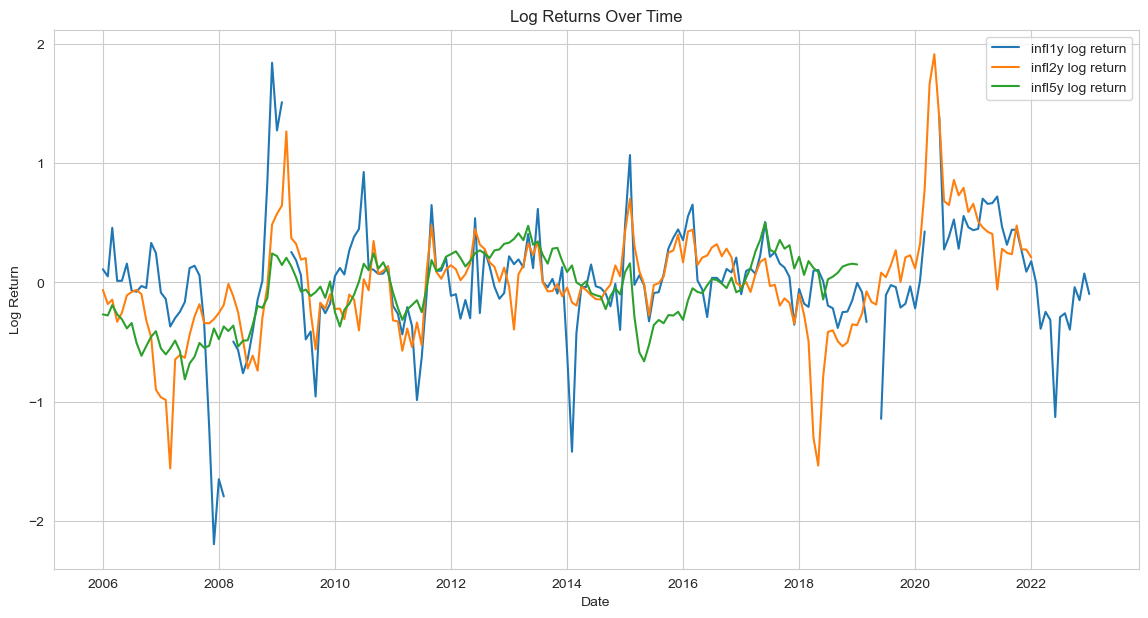

In [96]:
sns.set_style('whitegrid')

# Plot log returns over time for each market product
plt.figure(figsize=(14, 7))
for product in ['infl1y', 'infl2y', 'infl5y']:
    plt.plot(new_df.index, new_df[f'{product}_log_return'], label=f'{product} log return')

plt.legend()
plt.title('Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()

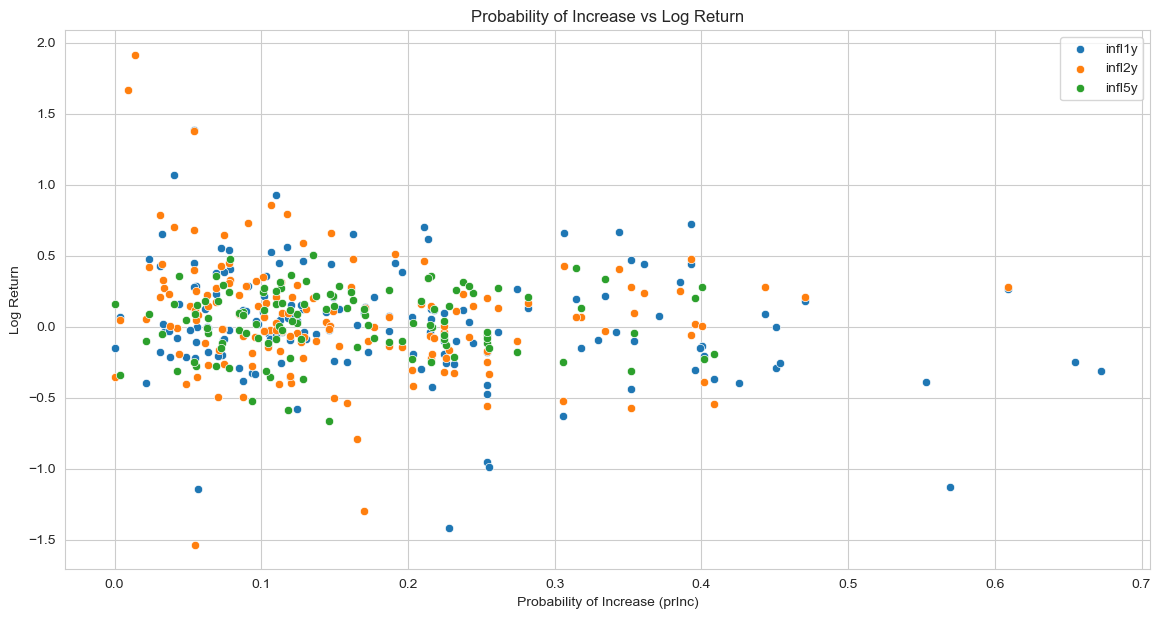

In [98]:
plt.figure(figsize=(14, 7))
for product in ['infl1y', 'infl2y', 'infl5y']:
    sns.scatterplot(x=new_df[f'{product}_prInc'], y=new_df[f'{product}_log_return'], label=f'{product}')

plt.legend()
plt.title('Probability of Increase vs Log Return')
plt.xlabel('Probability of Increase (prInc)')
plt.ylabel('Log Return')
plt.show()

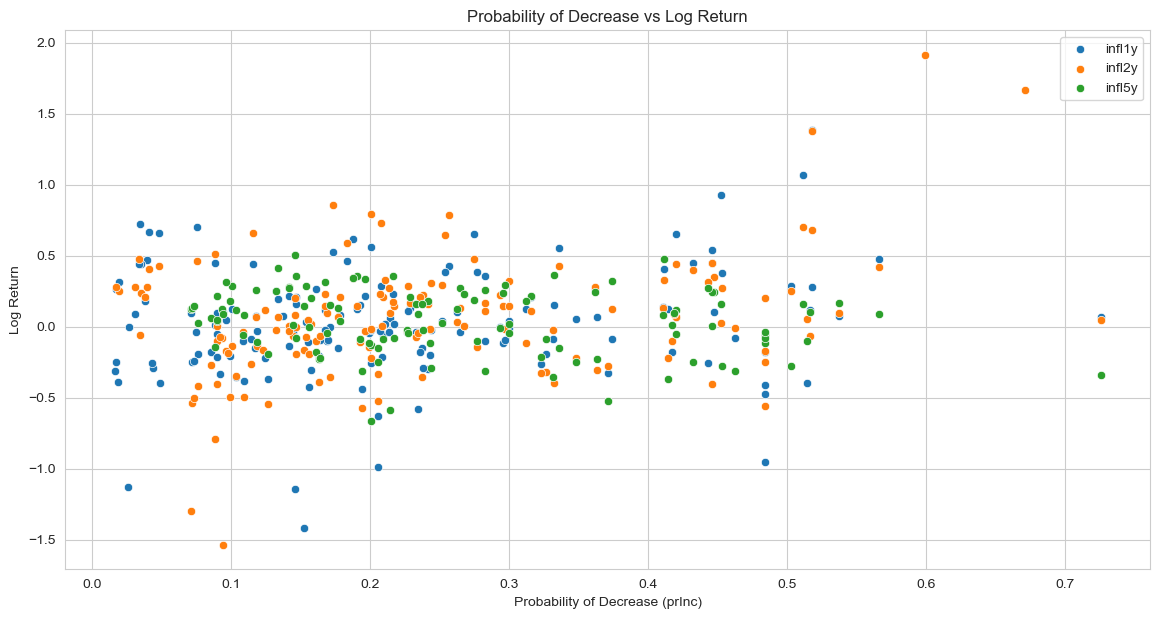

In [99]:
plt.figure(figsize=(14, 7))
for product in ['infl1y', 'infl2y', 'infl5y']:
    sns.scatterplot(x=new_df[f'{product}_prDec'], y=new_df[f'{product}_log_return'], label=f'{product}')

plt.legend()
plt.title('Probability of Decrease vs Log Return')
plt.xlabel('Probability of Decrease (prInc)')
plt.ylabel('Log Return')
plt.show()

In [102]:
proportions_df = pd.DataFrame(index=['infl1y', 'infl2y', 'infl5y'], columns=['prop_positive', 'prop_negative'])

for product in ['infl1y', 'infl2y', 'infl5y']:
    condition_positive = (new_df[f'{product}_prInc'] > new_df[f'{product}_prDec']) & (new_df[f'{product}_log_return'] > 0)
    condition_negative = (new_df[f'{product}_prInc'] < new_df[f'{product}_prDec']) & (new_df[f'{product}_log_return'] < 0)

    proportions_df.loc[product, 'prop_positive'] = condition_positive.sum() / condition_positive.count()
    proportions_df.loc[product, 'prop_negative'] = condition_negative.sum() / condition_negative.count()

proportions_df

,prop_positive,prop_negative
infl1y,0.138249,0.207373
infl2y,0.105991,0.179724
infl5y,0.110599,0.16129


prop_positive for the proportion of positive log returns when prInc > prDec, and prop_negative for the proportion of negative log returns when prInc < prDec, for each product.